In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pywaffle import Waffle
import math
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
!pip install pywaffle

In [2]:
base = pd.read_csv('Base mesclada filtrada.csv')

In [3]:
base_original = base.copy()
base.drop(labels=['Ano da Venda','Ano da Construção','Unnamed: 0'], axis=1, inplace=True)

In [4]:
base.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8


In [5]:
base.shape

(2919, 8)

In [6]:
base.corr()

,Preço da venda,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel
Preço da venda,1.000000,0.229611,0.464809,0.296497,0.433710,-0.363226
Número de Quartos,0.229611,1.000000,0.073912,0.132801,0.356125,0.052136
Área da Garagem,0.464809,0.073912,1.000000,0.213251,0.408487,-0.480602
Área do Lote,0.296497,0.132801,0.213251,1.000000,0.125826,-0.025143
Número de Banheiros,0.433710,0.356125,0.408487,0.125826,1.000000,-0.470686
Idade do Imóvel,-0.363226,0.052136,-0.480602,-0.025143,-0.470686,1.000000


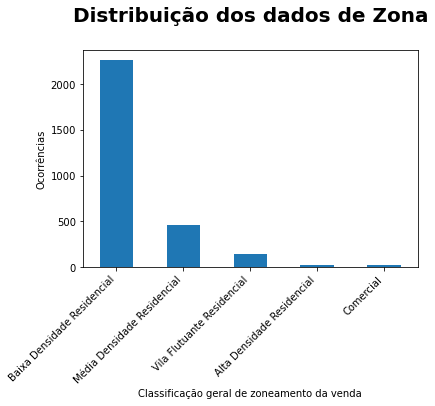

In [53]:
base['Zona'].value_counts().to_frame().plot(kind='bar', legend=None)
plt.title('Distribuição dos dados de Zona\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências')
plt.xlabel('Classificação geral de zoneamento da venda')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

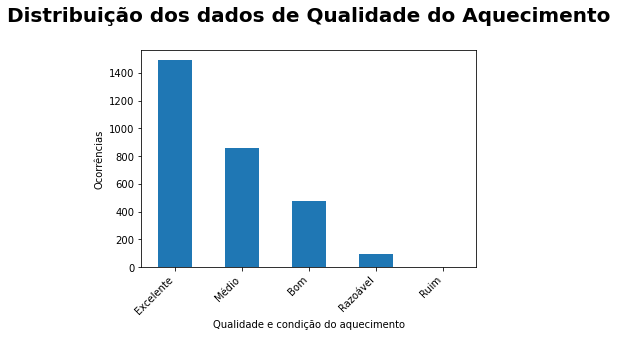

In [54]:
base['Qualidade do Aquecimento'].value_counts().to_frame().plot(kind='bar', legend=None)
plt.title('Distribuição dos dados de Qualidade do Aquecimento\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Ocorrências')
plt.xlabel('Qualidade e condição do aquecimento')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [9]:
base['MSZoning'].shape[0]

2919

In [19]:
valores_grafico = (base['Zona'].value_counts()/base['Zona'].shape[0]*100).apply(lambda x: math.ceil(x)).to_dict()

In [20]:
valores_grafico

{'Baixa Densidade Residencial': 78,
 'Média Densidade Residencial': 16,
 'Vila Flutuante Residencial': 5,
 'Alta Densidade Residencial': 1,
 'Comercial': 1}

In [23]:
# compensar para o gráfico ficar mais bonito
valores_grafico['Comercial']=valores_grafico['Comercial']-1

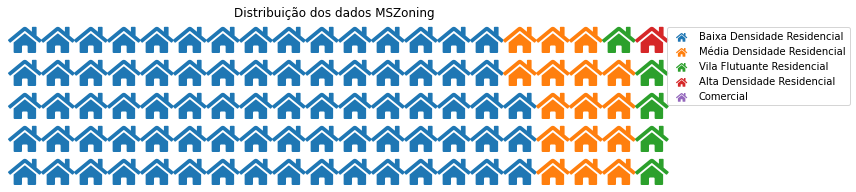

In [24]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=valores_grafico, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', 
    font_size=30, 
    icon_legend=True,
    figsize=(12, 8)
)
plt.title('Distribuição dos dados MSZoning')
plt.show()

In [25]:
valores_grafico2 = (base['Qualidade do Aquecimento'].value_counts()/base['Qualidade do Aquecimento'].shape[0]*100).apply(lambda x: math.ceil(x)).to_dict()

In [26]:
valores_grafico2

{'Excelente': 52, 'Médio': 30, 'Bom': 17, 'Razoável': 4, 'Ruim': 1}

In [28]:
# compensar para o gráfico ficar maos bonito
valores_grafico2['Excelente']=valores_grafico2['Excelente']+1

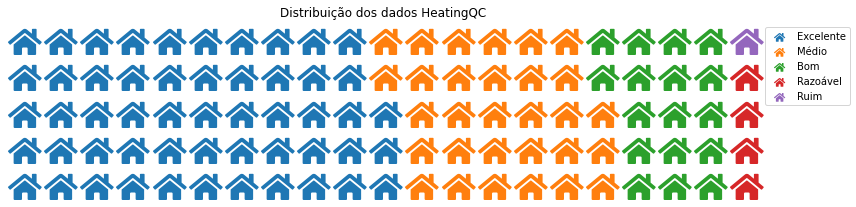

In [29]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=valores_grafico2, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='home', 
    font_size=30, 
    icon_legend=True,
    figsize=(12, 8)
)
plt.title('Distribuição dos dados HeatingQC')
plt.show()

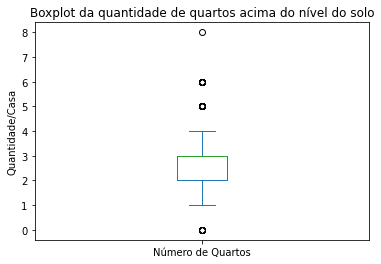

In [30]:
base[['Número de Quartos']].plot(kind='box')
plt.title('Boxplot da quantidade de quartos acima do nível do solo')
plt.ylabel('Quantidade/Casa')
plt.show()

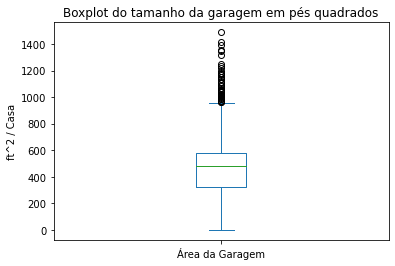

In [31]:
base[['Área da Garagem']].plot(kind='box')
plt.title('Boxplot do tamanho da garagem em pés quadrados')
plt.ylabel('ft^2 / Casa')
plt.show()

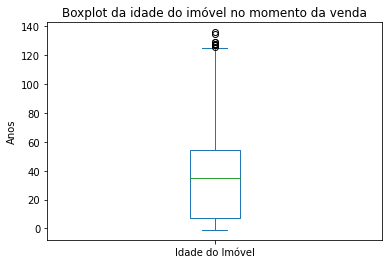

In [32]:
base[['Idade do Imóvel']].plot(kind='box')
plt.title('Boxplot da idade do imóvel no momento da venda')
plt.ylabel('Anos')
plt.show()

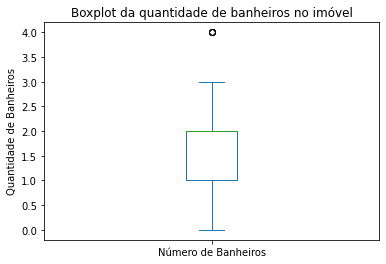

In [33]:
base[['Número de Banheiros']].plot(kind='box')
plt.title('Boxplot da quantidade de banheiros no imóvel')
plt.ylabel('Quantidade de Banheiros')
plt.show()

## Usando one-hot encoding para quantificar os dados qualitativos

In [34]:
dummy_MSZoning = pd.get_dummies(base['Zona'])
dummy_HeatingQC = pd.get_dummies(base['Qualidade do Aquecimento'])
base_dummy = base.merge(dummy_MSZoning,left_index=True,right_index=True)
base_dummy = base_dummy.merge(dummy_HeatingQC,left_index=True,right_index=True)

In [35]:
base_dummy.corr()

,Preço da venda,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
Preço da venda,1.000000,0.229611,0.464809,0.296497,0.433710,-0.363226,-0.054856,0.210173,-0.075810,-0.230235,0.035770,-0.099081,0.305709,-0.218063,-0.093934,-0.017271
Número de Quartos,0.229611,1.000000,0.073912,0.132801,0.356125,0.052136,0.024975,0.137434,-0.042963,-0.100253,-0.087169,-0.011007,-0.011929,0.027241,-0.009871,-0.020546
Área da Garagem,0.464809,0.073912,1.000000,0.213251,0.408487,-0.480602,-0.046038,0.193937,-0.094305,-0.250265,0.113654,-0.106511,0.314084,-0.212983,-0.116688,-0.010012
Área do Lote,0.296497,0.132801,0.213251,1.000000,0.125826,-0.025143,-0.031998,0.236318,-0.021774,-0.206661,-0.102614,-0.022645,0.018455,0.000193,-0.005352,-0.000814
Número de Banheiros,0.433710,0.356125,0.408487,0.125826,1.000000,-0.470686,0.001530,0.124051,-0.082038,-0.216461,0.165990,-0.092800,0.334659,-0.266381,-0.064748,-0.013614
Idade do Imóvel,-0.363226,0.052136,-0.480602,-0.025143,-0.470686,1.000000,0.058366,-0.290233,0.155790,0.412859,-0.240404,0.160922,-0.459562,0.305349,0.173118,0.033332
Alta Densidade Residencial,-0.054856,0.024975,-0.046038,-0.031998,0.001530,0.058366,1.000000,-0.176424,-0.008811,-0.041003,-0.021198,-0.002195,-0.031354,0.042967,-0.017102,-0.003041
Baixa Densidade Residencial,0.210173,0.137434,0.193937,0.236318,0.124051,-0.290233,-0.176424,1.000000,-0.172968,-0.804905,-0.416131,-0.048568,0.056717,-0.007198,-0.030039,-0.059691
Comercial,-0.075810,-0.042963,-0.094305,-0.021774,-0.082038,0.155790,-0.008811,-0.172968,1.000000,-0.040199,-0.020783,-0.000601,-0.057915,0.038044,0.068350,-0.002981
Média Densidade Residencial,-0.230235,-0.100253,-0.250265,-0.206661,-0.216461,0.412859,-0.041003,-0.804905,-0.040199,1.000000,-0.096713,0.095103,-0.152885,0.070088,0.045755,0.044815


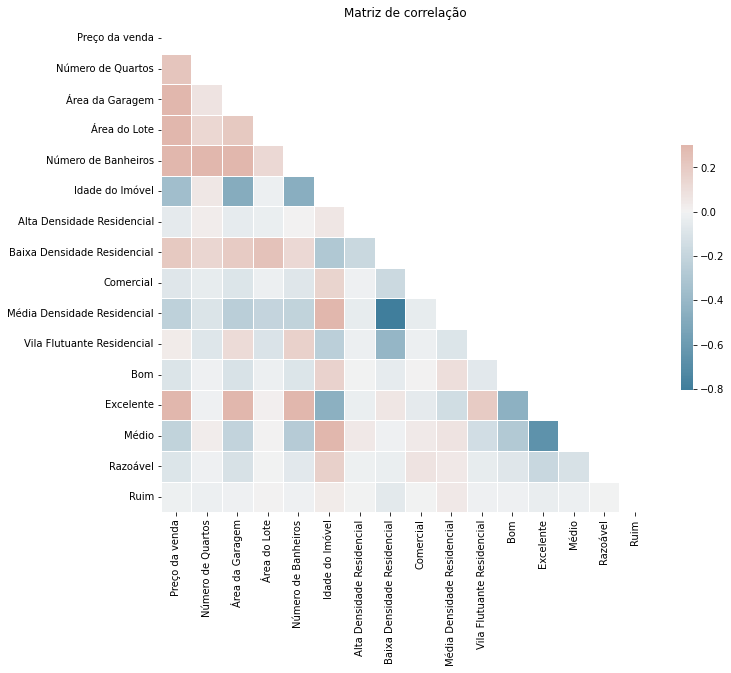

In [36]:
# Compute the correlation matrix
corr = base_dummy.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Matriz de correlação')
plt.show()

## medidas resumo (tendência central das variáveis escolhidas: média, moda, mediana)

In [37]:
base_dummy.describe().to_excel('medidasresumo.xlsx')

## Distribuição dos preços

Text(0.5, 0, 'Preço (USD)')

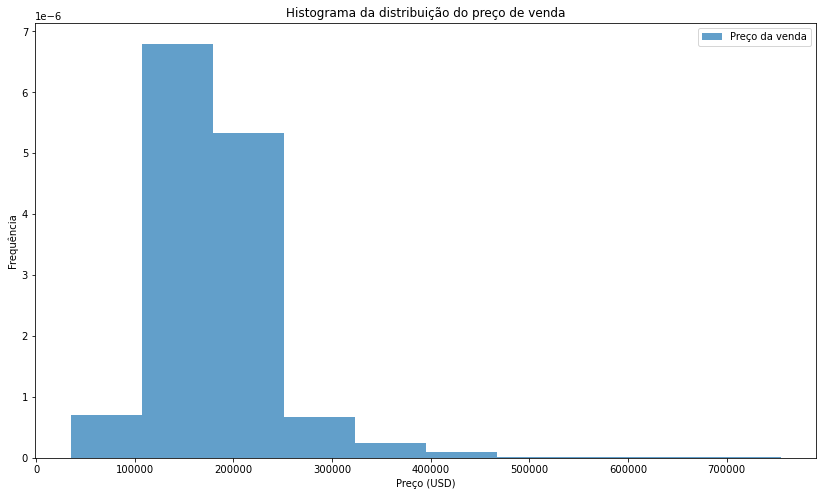

In [38]:
contagem, tam_coluna = np.histogram(base_dummy['Preço da venda'])

base_dummy[['Preço da venda']].plot(kind='hist', alpha=0.7, density=True, figsize=(14,8))
plt.title('Histograma da distribuição do preço de venda')
plt.ylabel('Frequência')
plt.xlabel('Preço (USD)')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Baixa Densidade Residencial' 'Baixa Densidade Residencial'
 'Baixa Densidade Residencial' ... 'Baixa Densidade Residencial'
 'Baixa Densidade Residencial' 'Baixa Densidade Residencial']

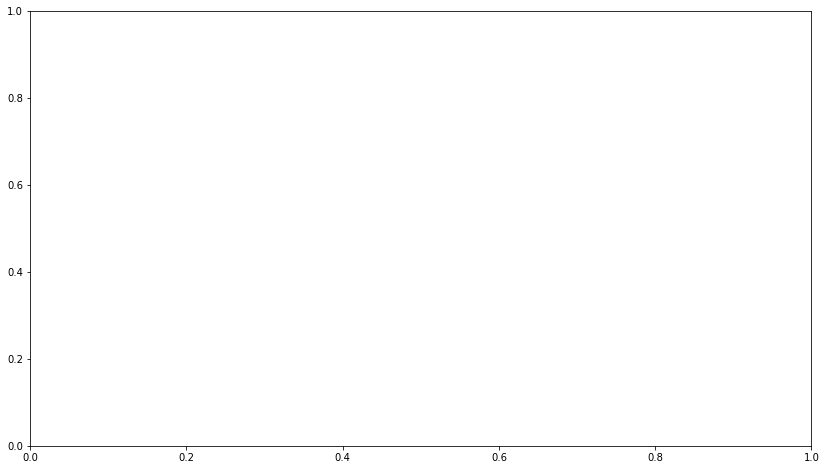

In [58]:
base_dummy.plot(kind='scatter', y='Preço da venda', x='Idade do Imóvel', c='Zona', alpha=0.7, figsize=(14,8))
plt.title('Dispersão dos dados de venda com relação a idade do imóvel\n', fontdict = {'fontsize':20, 'fontweight':'bold'})
plt.ylabel('Preço da venda (USD)')
plt.xlabel('Idade do Imóvel (anos)')

In [59]:
base_dummy.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5,0,1,0,0,0,0,1,0,0,0
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31,0,1,0,0,0,0,1,0,0,0
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7,0,1,0,0,0,0,1,0,0,0
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91,0,1,0,0,0,1,0,0,0,0
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8,0,1,0,0,0,0,1,0,0,0


## Matriz covariancia

In [43]:
base_dummy_num = base_dummy.drop(['Zona','Qualidade do Aquecimento'], axis=1)
base_dummy_num_filtrada = base_dummy_num[base_dummy_num['Área da Garagem'].isnull()==False]
base_dummy_num_filtrada_sem_preco_lotarea = base_dummy_num_filtrada.drop(['Preço da venda','Área do Lote'], axis=1)

In [44]:
# matriz de covariancia
covariancia = np.cov(base_dummy_num_filtrada, rowvar=False)

In [45]:
pd.DataFrame(covariancia, columns=base_dummy_num_filtrada.columns, index=base_dummy_num_filtrada.columns)

,Preço da venda,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
Preço da venda,3.293769e+09,10843.188530,5.745881e+06,1.342297e+08,13766.924283,-632445.512254,-295.911253,5030.241975,-401.069735,-4815.144880,437.273865,-2098.062287,8773.753812,-5701.688777,-942.230782,-31.771966
Número de Quartos,1.084319e+04,0.677049,1.309970e+01,8.620403e+02,0.162045,1.299341,0.001932,0.047205,-0.003258,-0.030107,-0.015278,-0.003334,-0.004932,0.010225,-0.001418,-0.000542
Área da Garagem,5.745881e+06,13.099700,4.639493e+04,3.623361e+05,48.656783,-3139.592491,-0.932033,17.413128,-1.872425,-19.629561,5.215096,-8.463677,33.823154,-20.897672,-4.392684,-0.069120
Área do Lote,1.342297e+08,862.040275,3.623361e+05,6.222562e+07,549.115091,-5999.684660,-23.727405,777.242191,-15.836252,-593.859674,-172.457882,-65.963345,72.979501,0.580318,-7.390275,-0.206199
Número de Banheiros,1.376692e+04,0.162045,4.865678e+01,5.491151e+02,0.305816,-7.905488,0.000081,0.028731,-0.004181,-0.043759,0.019564,-0.018911,0.092479,-0.067073,-0.006254,-0.000241
Idade do Imóvel,-6.324455e+05,1.299341,-3.139592e+03,-5.999685e+03,-7.905488,919.825043,0.166590,-3.660343,0.435862,4.551996,-1.553120,1.803983,-6.980391,4.225448,0.918527,0.032434
Alta Densidade Residencial,-2.959113e+02,0.001932,-9.320325e-01,-2.372740e+01,0.000081,0.166590,0.008834,-0.006919,-0.000076,-0.001402,-0.000425,-0.000077,-0.001472,0.001839,-0.000281,-0.000009
Baixa Densidade Residencial,5.030242e+03,0.047205,1.741313e+01,7.772422e+02,0.028731,-3.660343,-0.006919,0.173764,-0.006653,-0.122140,-0.036988,-0.007517,0.011959,-0.001446,-0.002198,-0.000798
Comercial,-4.010697e+02,-0.003258,-1.872425e+00,-1.583625e+01,-0.004181,0.435862,-0.000076,-0.006653,0.008497,-0.001348,-0.000408,-0.000021,-0.002668,0.001597,0.001101,-0.000009
Média Densidade Residencial,-4.815145e+03,-0.030107,-1.962956e+01,-5.938597e+02,-0.043759,4.551996,-0.001402,-0.122140,-0.001348,0.132602,-0.007496,0.012835,-0.028005,0.011722,0.002924,0.000524


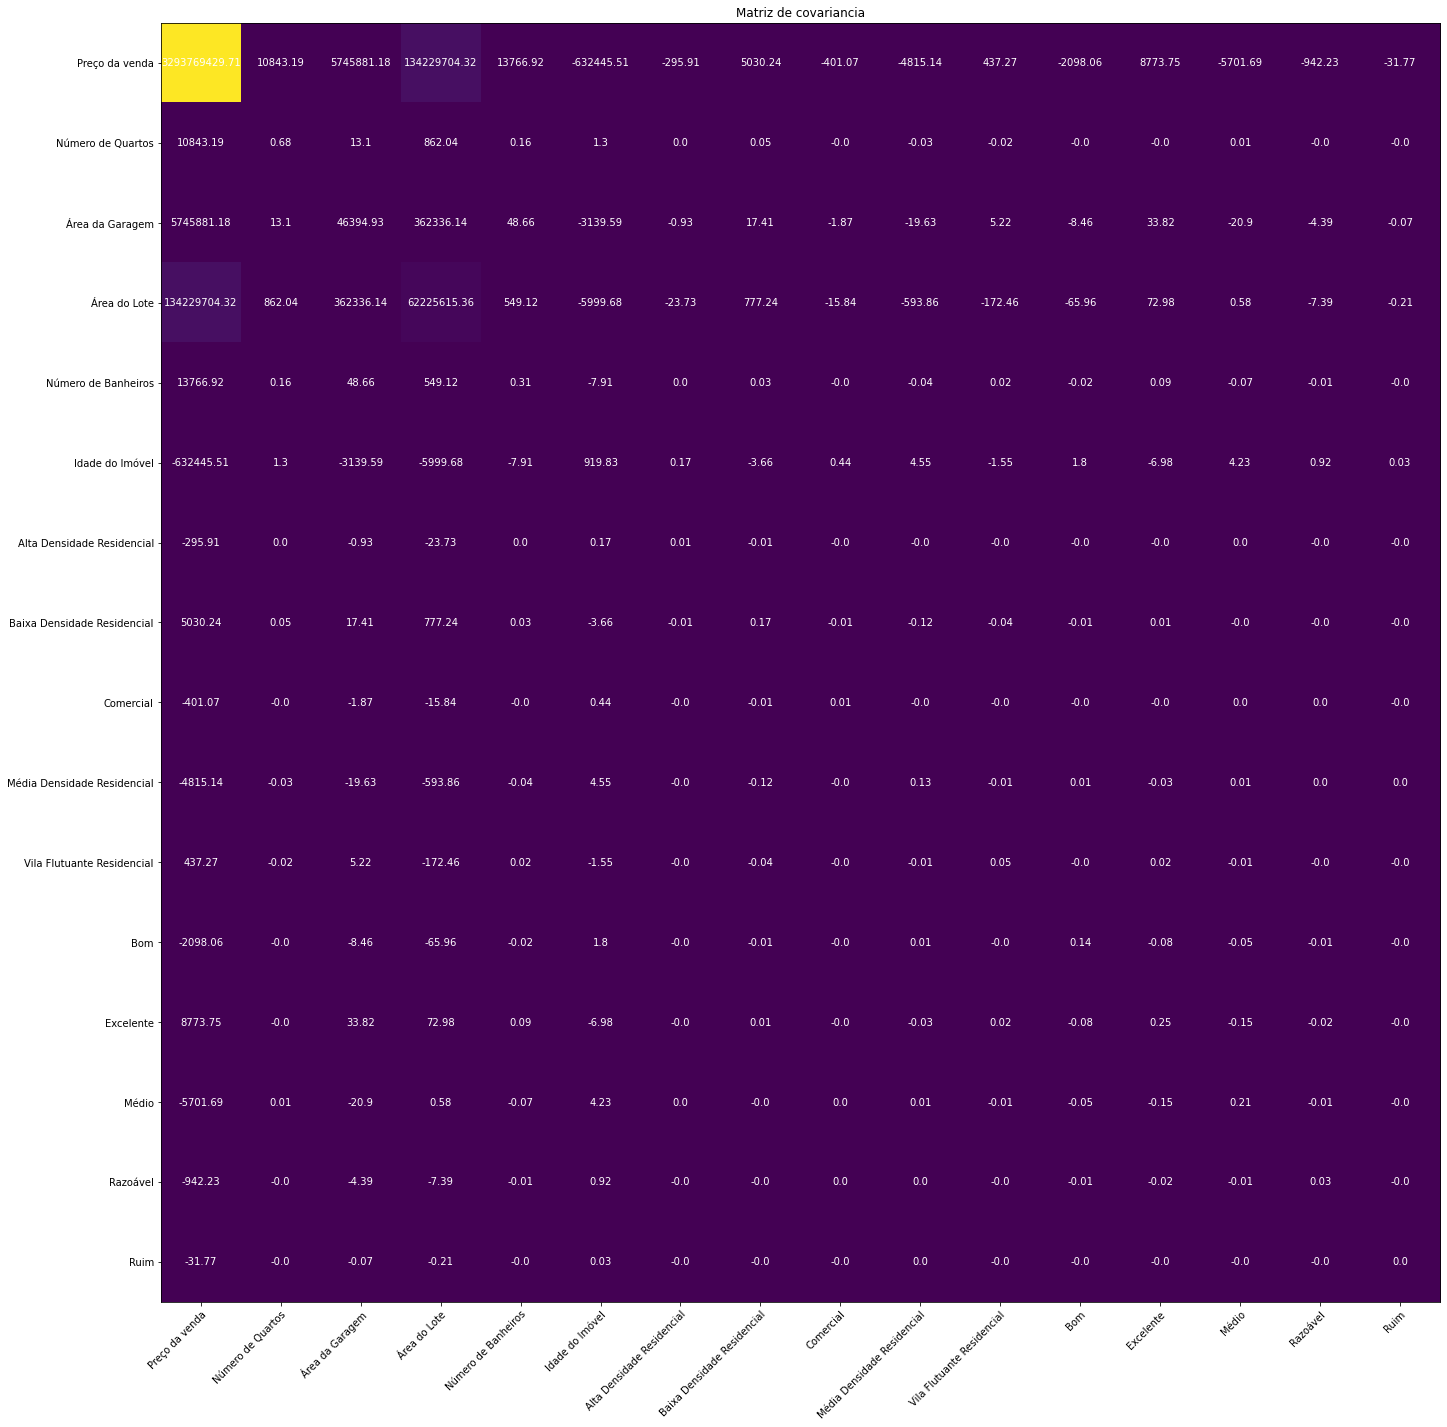

In [48]:

vegetables = base_dummy_num_filtrada.columns
farmers = base_dummy_num_filtrada.columns

harvest = np.array([[float("{:0.2f}".format(x)) for x in lista] for lista in covariancia])


fig, ax = plt.subplots(figsize=(20, 20))
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Matriz de covariancia")
fig.tight_layout()
plt.show()

## Comparação dos preços com as variáveis categóricas (TBD)

In [51]:
base_dummy.head()

,Preço da venda,Zona,Qualidade do Aquecimento,Número de Quartos,Área da Garagem,Área do Lote,Número de Banheiros,Idade do Imóvel,Alta Densidade Residencial,Baixa Densidade Residencial,Comercial,Média Densidade Residencial,Vila Flutuante Residencial,Bom,Excelente,Médio,Razoável,Ruim
0,208500.0,Baixa Densidade Residencial,Excelente,3,548.0,8450,2,5,0,1,0,0,0,0,1,0,0,0
1,181500.0,Baixa Densidade Residencial,Excelente,3,460.0,9600,2,31,0,1,0,0,0,0,1,0,0,0
2,223500.0,Baixa Densidade Residencial,Excelente,3,608.0,11250,2,7,0,1,0,0,0,0,1,0,0,0
3,140000.0,Baixa Densidade Residencial,Bom,3,642.0,9550,1,91,0,1,0,0,0,1,0,0,0,0
4,250000.0,Baixa Densidade Residencial,Excelente,4,836.0,14260,2,8,0,1,0,0,0,0,1,0,0,0
